<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/waves_compare_last_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Documentation

https://docs.stormglass.io/?utm_medium=email&_hsenc=p2ANqtz-9NtG7HIa1BhxP3kX2NPRJLRhL3kaXEfAvVmC9k-p8qYUe0KFQrPtaz34Ucy8W71I9wyEopdsQsCGZxj-QaXWlZug1hHQ&_hsmi=290896009&utm_content=290896009&utm_source=hs_automation#/weather


In [68]:
from datetime import date
from datetime import datetime,date
import time
import pandas as pd
import numpy as np
import statistics as st
from dateutil import parser

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Use bash commands to copy the most recent file from Google Drive to Colab environment
!cd /content/drive/MyDrive/weather && \
latest_file=$(ls *.json -t | head -2) && \
echo $latest_file && \
cp $latest_file /content/

2024-08-05T07:53:00Z.waves.json 2023-08-06T07:28:40Z.waves.json


In [70]:
import subprocess

# Run the shell command and capture the output
result = subprocess.run("ls -rt *.json | head -2", shell=True, stdout=subprocess.PIPE, text=True)

# Get the name of the file
filenames = result.stdout.strip()

print("Using file ", filenames)

Using file  2024-08-05T07:53:00Z.waves.json
2023-08-06T07:28:40Z.waves.json


In [71]:


lines = filenames.split("\n")

# Extracting the required strings
for line in lines:
    if line.startswith("2024"):
        yesterday = line
    elif line.startswith("2023"):
        lastyear = line

# Output the results
print("lastyear:", lastyear)
print("yesterday", yesterday)

lastyear: 2023-08-06T07:28:40Z.waves.json
yesterday 2024-08-05T07:53:00Z.waves.json


In [72]:

import json

# Initialize an empty dictionary
data_dict = {}

with open(yesterday, 'r') as file:
    data_dict = json.load(file)

import pandas as pd

df_yesterday=pd.DataFrame()

df=pd.DataFrame(data_dict['hours'])

df_yesterday['time']=pd.to_datetime(df['time'])


columns=df.columns.to_list()
columns.remove('time')

for c in columns:
  if c in ["currentDirection", "currentSpeed"]:
     df_yesterday[c]=df[c].map(lambda l : l['meto'])
  else:
    df_yesterday[c]=df[c].map(lambda l : l['noaa'])

df_yesterday.set_index('time', inplace=True)

In [73]:
df_yesterday.iloc[0]

currentDirection     124.54
currentSpeed           0.01
gust                   3.50
swellDirection       267.97
swellHeight            1.03
swellPeriod            6.40
waterTemperature      28.43
waveDirection        275.87
waveHeight             1.03
wavePeriod             6.40
windDirection        250.09
windWaveDirection    265.48
windWaveHeight         0.82
windWavePeriod         6.05
Name: 2024-07-26 07:00:00+00:00, dtype: float64

In [74]:
# Initialize an empty dictionary
data_dict = {}

with open(lastyear, 'r') as file:
    data_dict = json.load(file)


df_lastyear=pd.DataFrame()

df=pd.DataFrame(data_dict['hours'])

df_lastyear['time']=pd.to_datetime(df['time'])

columns=df.columns.to_list()
columns.remove('time')

for c in columns:
  if c in ["currentDirection", "currentSpeed"]:
     df_lastyear[c]=df[c].map(lambda l : l['meto'])
  else:
    df_lastyear[c]=df[c].map(lambda l : l['noaa'])

df_lastyear.set_index('time', inplace=True)

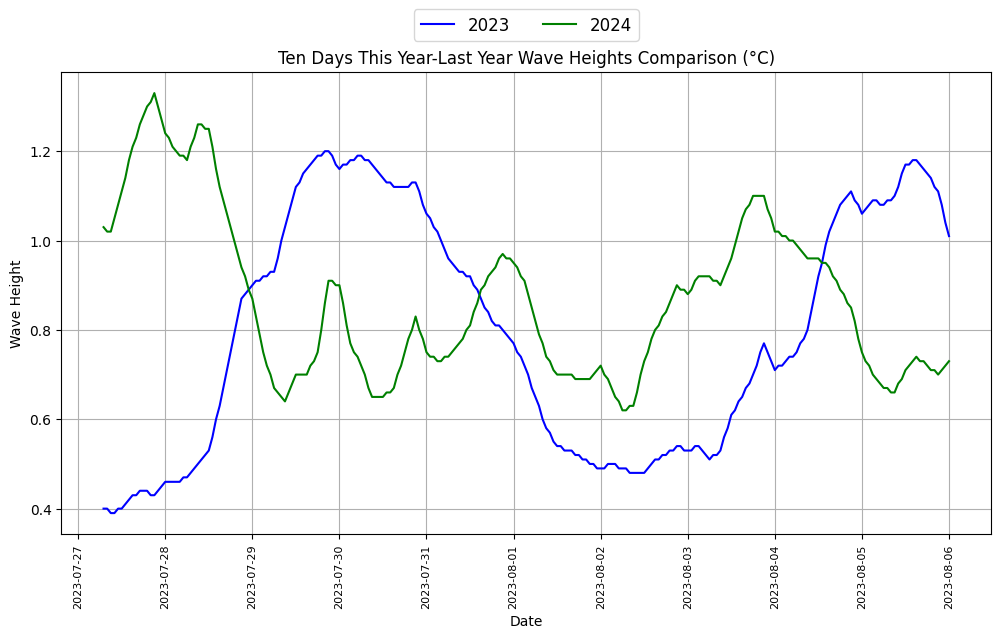

In [75]:
import matplotlib.pyplot as plt



# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
#ax.scatter(df_lastyear.index, df_lastyear['waveHeight'], s=200, alpha=0.6, color="orange", label='2023')
#ax.scatter(df_lastyear.index, df_yesterday['waveHeight'], s=200, alpha=0.6, color="purple", label='2024')

ax.plot(df_lastyear.index, df_lastyear['waveHeight'],color="blue", label='2023')
ax.plot(df_lastyear.index, df_yesterday['waveHeight'],color="green", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Wave Height')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Ten Days This Year-Last Year Wave Heights Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)


plt.grid()

# Show the plot
plt.show()

In [78]:
df_yesterday.iloc[0]

currentDirection     124.54
currentSpeed           0.01
gust                   3.50
swellDirection       267.97
swellHeight            1.03
swellPeriod            6.40
waterTemperature      28.43
waveDirection        275.87
waveHeight             1.03
wavePeriod             6.40
windDirection        250.09
windWaveDirection    265.48
windWaveHeight         0.82
windWavePeriod         6.05
Name: 2024-07-26 07:00:00+00:00, dtype: float64

In [79]:
df_lastyear.iloc[0]

currentDirection     155.26
currentSpeed           0.17
gust                   3.40
swellDirection       273.99
swellHeight            0.39
swellPeriod            5.42
waterTemperature      28.50
waveDirection        278.60
waveHeight             0.40
wavePeriod             5.42
windDirection        297.61
windWaveDirection    280.80
windWaveHeight         0.55
windWavePeriod         4.95
Name: 2023-07-27 07:00:00+00:00, dtype: float64